In [1]:
## This file tests the double integrator QP code
## Author : Avadesh Meduri
## Date : 11/02/2021

import numpy as np
from matplotlib import pyplot as plt
from solver import quadprog_solve_qp
from double_integrator import DoubleIntegrator

In [6]:
problem = DoubleIntegrator(20, 400)
wt = [1e-4,1e-4,1e-2]
wt_ter = [1e+4, 1e+5]

Q, q, A, b, G, h = problem.create_matrices([0,0], [-10,0], wt, wt_ter)

x,lag = quadprog_solve_qp(Q, q, G, h, A, b)

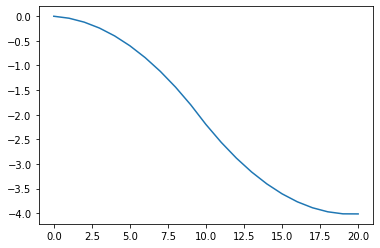

In [7]:
plt.plot(x[::3])

In [4]:
def create_kkt(Q, A, G, h, x_opt, lag):
    
    print(len(lag), G.shape[0])
    assert len(lag) == G.shape[0]
    
    D_lam = np.diag(lag)
    D_g = np.diag(np.matmul(G, x_opt) - h) #D(G*x^{*} - h)
    
    kkt = np.block([[Q, np.matmul(G.T,D_lam), A.T],
                    [G, D_g, np.zeros((G.shape[0], A.shape[0]))],
                    [A, np.zeros((A.shape[0], D_g.shape[1])), np.zeros((A.shape[0], A.shape[0]))]])
    
    return kkt

In [5]:
kkt = create_kkt(Q, A, G, h, x, lag)

40 40


In [15]:
a = np.eye(3)
np.fill_diagonal(a, [1,2,3])
print(a)

[[1. 0. 0.]
 [0. 2. 0.]
 [0. 0. 3.]]
